# Your info

Full name:Yasmin Madani

Student ID:97532265

# Q2

**Imports**

In [71]:
# Q2_graded
# Do not change the above line.
# -*- coding: utf-8 -*-
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from skimage.util import random_noise
from skimage.transform import resize

In [72]:
def Acc(train_imgs,preds,net):
  idx = 0
  avg_acc = 0
  for pre , org in zip(preds, train_imgs):
    img_vec = net.mat2vec(org)
    same_pixels = np.sum(img_vec == pre)
    avg_acc += (same_pixels / (net.Neuron_Num ) )
    print(f'image {idx+1} accuracy : {same_pixels / net.Neuron_Num  }')
    idx += 1
  print(f'total accuracy : {avg_acc/10 }')

**NET WORK CLASS**

In [73]:
# Q2_graded
class hopfield:
    def __init__(self,train_files, in_shape): 
        self.Neuron_Num = in_shape[0] * in_shape[1]
        self.Weghits = np.zeros((self.Neuron_Num , self.Neuron_Num))

    def mat2vec(self,img):
      img = np.divide(img, 256)
      img_mean = np.mean(img)
      img = np.where(img < img_mean, -1, 1)
      img = img.flatten()
      return img

    def creat_w_matrix(self,train_files):
          #read image and convert it to Numpy array
          print("Importing images and creating weight matrix....")
          for img in train_files:
            img = self.mat2vec(img)
            for i in range(self.Neuron_Num):
              for j in range(i, self.Neuron_Num):
                if i != j:
                    w_ij = img[i] * img[j]
                    self.Weghits[i][j] += w_ij
                    self.Weghits[j][i] += w_ij                  
                else:
                    self.Weghits[i][j] = 0

          print("Weight matrix is done!!")


    def energy(self, S):
      energy=  -0.5 * np.matmul(np.matmul(S.T,self.Weghits), S)
      return energy



    def Predict(self, pattern, iterations, Async=False):
      n_img = self.mat2vec(pattern)

      if Async == False:
        energy = self.energy(n_img)
        for i in range(iterations):
          n_img = np.sign(np.matmul(self.Weghits, n_img))
          after_energy = self.energy(n_img)
          if energy == after_energy:
            return n_img
          energy = after_energy
        return n_img

**MAKE DATA**

In [74]:
# Q2_graded
(x_train, y_train), (_, _ )= fashion_mnist.load_data()
train_imgs=[]
top_idx = np.where( y_train == 0 )[0]
Trouser_idx= np.where( y_train == 1 )[0]
Pullover_idx= np.where( y_train == 2 )[0]
Dress_idx= np.where( y_train == 3 )[0]
Coat_idx= np.where( y_train == 4 )[0]
Sandal_idx= np.where( y_train == 5 )[0]
Shirt_idx= np.where( y_train == 6 )[0]
Sneaker_idx= np.where( y_train == 7 )[0]
Bag_idx= np.where( y_train == 8 )[0]
boot_idx= np.where( y_train == 9 )[0]
for i in [top_idx,Trouser_idx,Pullover_idx,Dress_idx,Coat_idx,Sandal_idx,Shirt_idx,Sneaker_idx,Bag_idx,boot_idx]:
  rand_idx = i[np.random.randint(0, len(i))]
  train_imgs.append(x_train[rand_idx])

**MAKE NOISED DATA**

In [75]:
# Q2_graded
test_imgs_10_percent=[]
test_imgs_30_percent=[]
test_imgs_60_percent=[]
for data in train_imgs:
    tmp= random_noise(data , mode='s&p',amount=0.1)
    test_imgs_10_percent.append(tmp)

for data in train_imgs:
     tmp= random_noise(data , mode='s&p',amount=0.3)
     test_imgs_30_percent.append(tmp)

for data in train_imgs:
     tmp= random_noise(data , mode='s&p',amount=0.6)
     test_imgs_60_percent.append(tmp)

**Train and SHOW TRAIN IMAGES**

Importing images and creating weight matrix....
Weight matrix is done!!


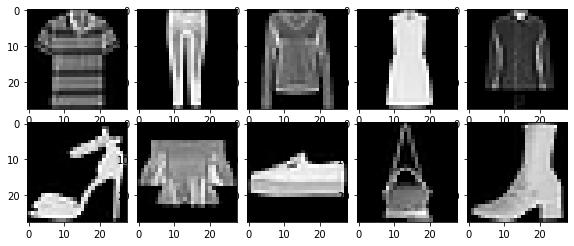

In [76]:
# Q2_graded
net=hopfield(train_imgs,(28,28))
net.creat_w_matrix(train_imgs)
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( train_imgs[idx], (28, 28)),  cmap='gray')
    idx += 1

**Predicts**

In [77]:
# Q2_graded
predicted_images_10 = []
predicted_images_30 = []
predicted_images_60= []
for img in test_imgs_10_percent:
  new_img = net.Predict(img, 2)
  predicted_images_10.append(new_img)

for img in test_imgs_30_percent:
  new_img = net.Predict(img, 2)
  predicted_images_30.append(new_img)


for img in test_imgs_60_percent:
  new_img = net.Predict(img, 2)
  predicted_images_60.append(new_img)


**SHOW Predictions and ACC**

acc for 10 percent noise in 28*28 net
image 1 accuracy : 0.8201530612244898
image 2 accuracy : 0.9107142857142857
image 3 accuracy : 0.8635204081632653
image 4 accuracy : 0.9272959183673469
image 5 accuracy : 0.9068877551020408
image 6 accuracy : 0.8558673469387755
image 7 accuracy : 0.8086734693877551
image 8 accuracy : 0.7512755102040817
image 9 accuracy : 0.8214285714285714
image 10 accuracy : 0.7155612244897959
total accuracy : 0.8381377551020408
acc for 30 percent noise in 28*28 net
image 1 accuracy : 0.8201530612244898
image 2 accuracy : 0.9107142857142857
image 3 accuracy : 0.8584183673469388
image 4 accuracy : 0.9272959183673469
image 5 accuracy : 0.8698979591836735
image 6 accuracy : 0.9936224489795918
image 7 accuracy : 0.8086734693877551
image 8 accuracy : 0.7232142857142857
image 9 accuracy : 0.8252551020408163
image 10 accuracy : 0.7155612244897959
total accuracy : 0.8452806122448979
acc for 60 percent noise in 28*28 net
image 1 accuracy : 0.8188775510204082
image 2 accura

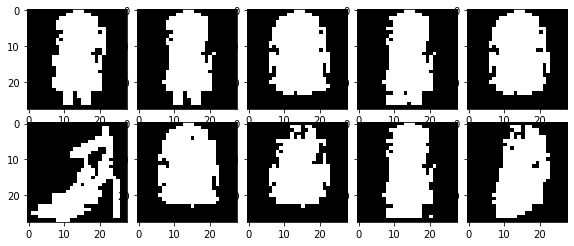

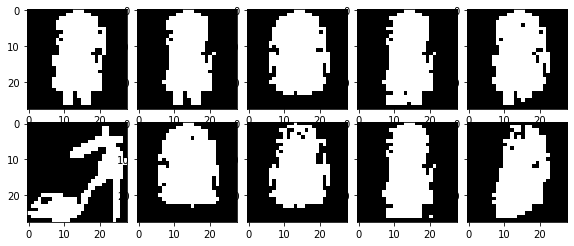

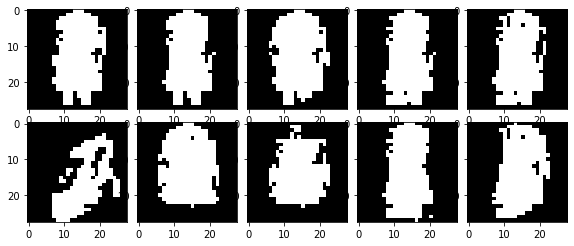

In [78]:
# Q2_graded
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( predicted_images_10[idx], (28, 28)),  cmap='gray')
    idx += 1
    
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( predicted_images_30[idx], (28, 28)),  cmap='gray')
    idx += 1

fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( predicted_images_60[idx], (28, 28)),  cmap='gray')
    idx += 1

print("acc for 10 percent noise in 28*28 net")
Acc(train_imgs,predicted_images_10,net)
print("acc for 30 percent noise in 28*28 net")
Acc(train_imgs,predicted_images_30,net)
print("acc for 60 percent noise in 28*28 net")
Acc(train_imgs,predicted_images_60,net)

**NETs with other Num_nureouns**

making data prepared for nets

In [79]:
# Q2_graded
train_imgs_32 = []
train_imgs_15 = []
for img in train_imgs:
  resized32_img = resize(img, (32, 32))
  resized15_img = resize(img, (15, 15))
  train_imgs_32.append(resized32_img)
  train_imgs_15.append(resized15_img)

test_imgs_10_percent_15=[]
test_imgs_30_percent_15=[]
test_imgs_60_percent_15=[]
for data in train_imgs_15:
    tmp= random_noise(data , mode='s&p',amount=0.1)
    test_imgs_10_percent_15.append(tmp)

for data in train_imgs_15:
     tmp= random_noise(data , mode='s&p',amount=0.3)
     test_imgs_30_percent_15.append(tmp)

for data in train_imgs_15:
     tmp= random_noise(data , mode='s&p',amount=0.6)
     test_imgs_60_percent_15.append(tmp)


test_imgs_10_percent_32=[]
test_imgs_30_percent_32=[]
test_imgs_60_percent_32=[]
for data in train_imgs_32:
    tmp= random_noise(data , mode='s&p',amount=0.1)
    test_imgs_10_percent_32.append(tmp)

for data in train_imgs_32:
     tmp= random_noise(data , mode='s&p',amount=0.3)
     test_imgs_30_percent_32.append(tmp)

for data in train_imgs_32:
     tmp= random_noise(data , mode='s&p',amount=0.6)
     test_imgs_60_percent_32.append(tmp)


32*32 NET

Importing images and creating weight matrix....
Weight matrix is done!!
acc for 10 percent noise in 32*32 net
image 1 accuracy : 0.8486328125
image 2 accuracy : 0.9228515625
image 3 accuracy : 0.8798828125
image 4 accuracy : 0.9228515625
image 5 accuracy : 0.947265625
image 6 accuracy : 0.9990234375
image 7 accuracy : 0.810546875
image 8 accuracy : 0.73046875
image 9 accuracy : 0.83203125
image 10 accuracy : 0.783203125
total accuracy : 0.86767578125
acc for 30 percent noise in 32*32 net
image 1 accuracy : 0.849609375
image 2 accuracy : 0.9248046875
image 3 accuracy : 0.8798828125
image 4 accuracy : 0.9228515625
image 5 accuracy : 0.83203125
image 6 accuracy : 0.9990234375
image 7 accuracy : 0.810546875
image 8 accuracy : 0.7119140625
image 9 accuracy : 0.84375
image 10 accuracy : 0.7919921875
total accuracy : 0.856640625
acc for 60 percent noise in 32*32 net
image 1 accuracy : 0.8173828125
image 2 accuracy : 0.9228515625
image 3 accuracy : 0.875
image 4 accuracy : 0.9091796875
image 5

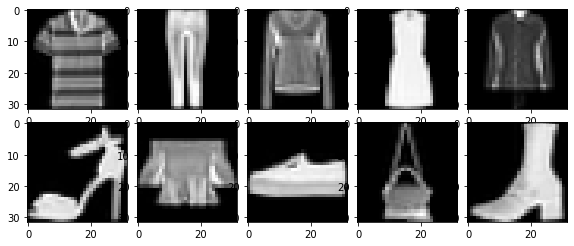

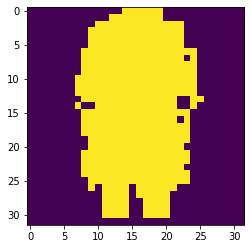

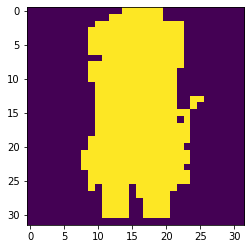

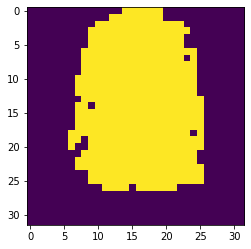

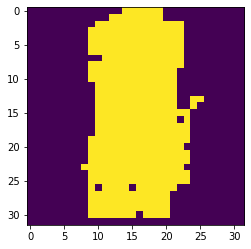

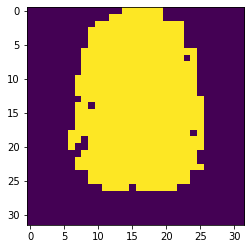

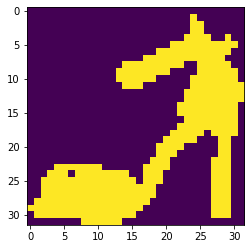

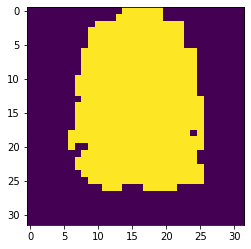

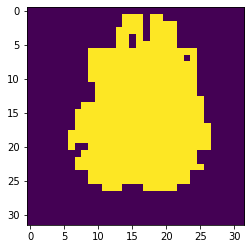

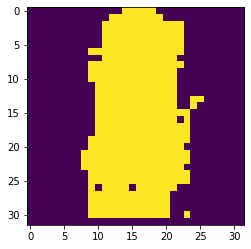

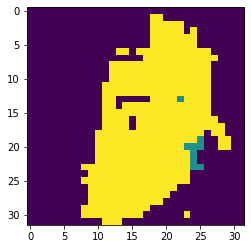

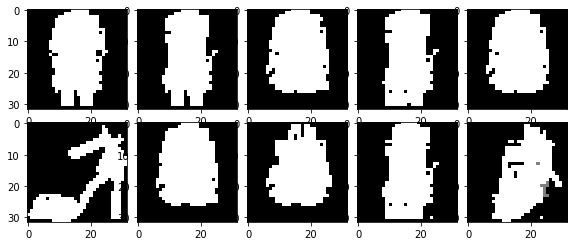

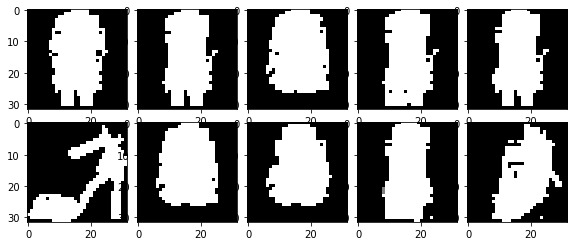

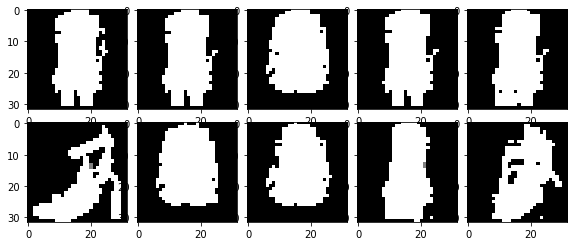

In [80]:
# Q2_graded
net32=hopfield(train_imgs_32,(32,32))
net32.creat_w_matrix(train_imgs_32)
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( train_imgs_32[idx], (32, 32)),  cmap='gray')
    idx += 1


predicted_images_10_32 = []
predicted_images_30_32 = []
predicted_images_60_32= []
for img in test_imgs_10_percent_32:
  new_img = net32.Predict(img, 2)
  predicted_images_10_32.append(new_img)
  plt.figure()
  plt.imshow(np.reshape(new_img, (32, 32)))

for img in test_imgs_30_percent_32:
  new_img = net32.Predict(img, 2)
  predicted_images_30_32.append(new_img)


for img in test_imgs_60_percent_32:
  new_img = net32.Predict(img, 2)
  predicted_images_60_32.append(new_img)



fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( predicted_images_10_32[idx], (32, 32)),  cmap='gray')
    idx += 1
    
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( predicted_images_30_32[idx], (32, 32)),  cmap='gray')
    idx += 1

fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( predicted_images_60_32[idx], (32, 32)),  cmap='gray')
    idx += 1

print("acc for 10 percent noise in 32*32 net")
Acc(train_imgs_32,predicted_images_10_32,net32)
print("acc for 30 percent noise in 32*32 net")
Acc(train_imgs_32,predicted_images_30_32,net32)
print("acc for 60 percent noise in 32*32 net")
Acc(train_imgs_32,predicted_images_60_32,net32)


15*15 NET

Importing images and creating weight matrix....
Weight matrix is done!!
acc for 10 percent noise in15*15 net
image 1 accuracy : 0.8222222222222222
image 2 accuracy : 0.9466666666666667
image 3 accuracy : 0.8888888888888888
image 4 accuracy : 0.9288888888888889
image 5 accuracy : 0.9688888888888889
image 6 accuracy : 1.0
image 7 accuracy : 0.8044444444444444
image 8 accuracy : 0.7244444444444444
image 9 accuracy : 0.8711111111111111
image 10 accuracy : 0.7955555555555556
total accuracy : 0.8751111111111112
acc for 30 percent noise in 15*15 net
image 1 accuracy : 0.8177777777777778
image 2 accuracy : 0.9466666666666667
image 3 accuracy : 0.8888888888888888
image 4 accuracy : 0.9288888888888889
image 5 accuracy : 0.9555555555555556
image 6 accuracy : 0.7288888888888889
image 7 accuracy : 0.8044444444444444
image 8 accuracy : 0.7644444444444445
image 9 accuracy : 0.8711111111111111
image 10 accuracy : 0.6666666666666666
total accuracy : 0.8373333333333333
acc for 60 percent noise in 15*15 

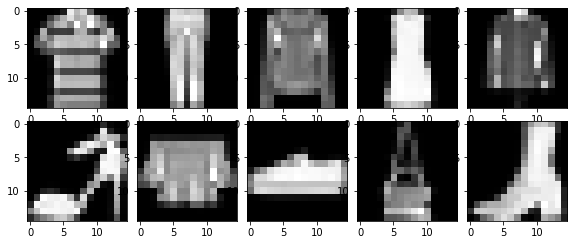

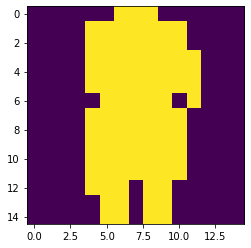

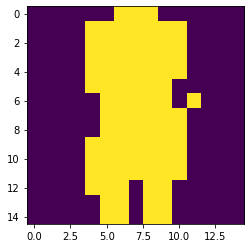

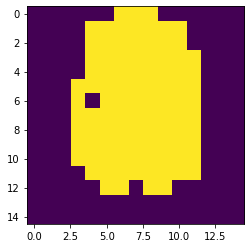

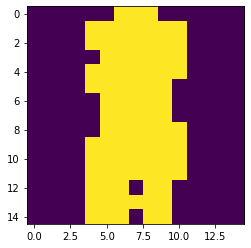

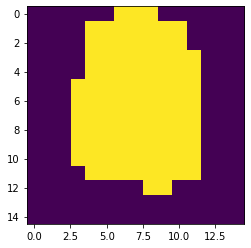

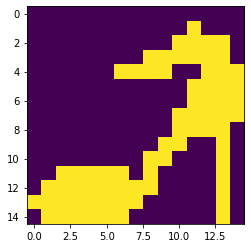

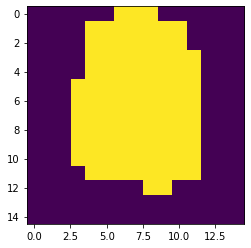

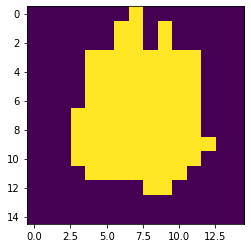

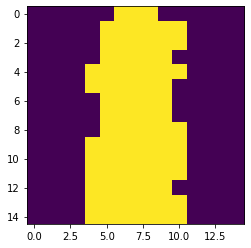

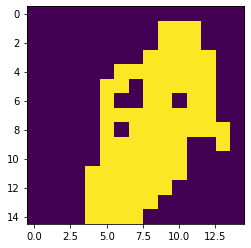

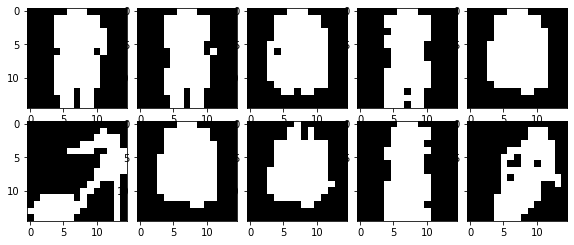

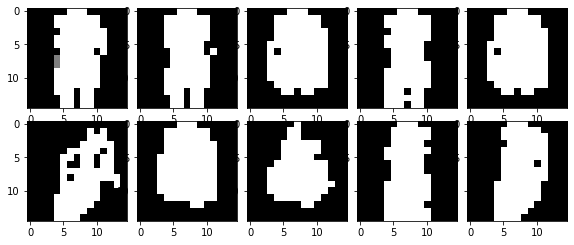

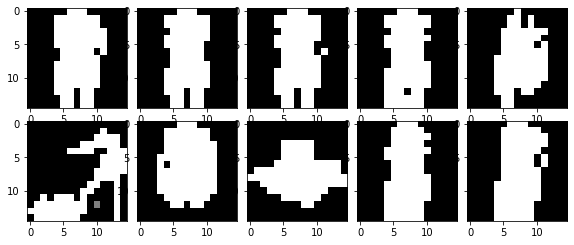

In [81]:
# Q2_graded
net15=hopfield(train_imgs_15,(15,15))
net15.creat_w_matrix(train_imgs_15)
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( train_imgs_15[idx], (15, 15)),  cmap='gray')
    idx += 1


predicted_images_10_15 = []
predicted_images_30_15 = []
predicted_images_60_15= []
for img in test_imgs_10_percent_15:
  new_img = net15.Predict(img, 2)
  predicted_images_10_15.append(new_img)
  plt.figure()
  plt.imshow(np.reshape(new_img, (15, 15)))

for img in test_imgs_30_percent_15:
  new_img = net15.Predict(img, 2)
  predicted_images_30_15.append(new_img)


for img in test_imgs_60_percent_15:
  new_img = net15.Predict(img, 2)
  predicted_images_60_15.append(new_img)



fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( predicted_images_10_15[idx], (15, 15)),  cmap='gray')
    idx += 1
    
fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( predicted_images_30_15[idx], (15, 15)),  cmap='gray')
    idx += 1

fig, axeslist = plt.subplots(ncols=5, nrows=2, figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0, right=0.5, bottom=0, top=0.2)
idx = 0
for i in range(2):
  for j in range(5):
    axeslist[i][j].imshow(np.reshape( predicted_images_60_15[idx], (15, 15)),  cmap='gray')
    idx += 1

print("acc for 10 percent noise in15*15 net")
Acc(train_imgs_15,predicted_images_10_15,net15)
print("acc for 30 percent noise in 15*15 net")
Acc(train_imgs_15,predicted_images_30_15,net15)
print("acc for 60 percent noise in 15*15 net")
Acc(train_imgs_15,predicted_images_60_15,net15)

# Q3

In [82]:
# Q3_graded
# Do not change the above line.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [83]:
# Q3_graded
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

def read_tsp():
        node_coord_start = None
        dimension = None
        cities = pd.read_csv("Cities.csv",sep=' ',names=['city', 'y', 'x'],
            dtype={'city': str, 'x': np.float64, 'y': np.float64},
            header=None,
            nrows=dimension )


        return cities

def normalize(points):
    """
    Return the normalized version of a given vector of points.
    For a given array of n-dimensions, normalize each dimension by removing the
    initial offset and normalizing the points in a proportional interval: [0,1]
    on y, maintining the original ratio on x.
    """
    ratio = (points.x.max() - points.x.min()) / (points.y.max() - points.y.min()), 1
    ratio = np.array(ratio) / max(ratio)
    norm = points.apply(lambda c: (c - c.min()) / (c.max() - c.min()))
    return norm.apply(lambda p: ratio * p, axis=1)

def select_closest(candidates, origin):
    """Return the index of the closest candidate to a given point."""
    return euclidean_distance(candidates, origin).argmin()

def euclidean_distance(a, b):
    """Return the array of distances of two numpy arrays of points."""
    return np.linalg.norm(a - b, axis=1)

def route_distance(cities):
    """Return the cost of traversing a route of cities in a certain order."""
    points = cities[['x', 'y']]
    distances = euclidean_distance(points, np.roll(points, 1, axis=0))
    return np.sum(distances)

def generate_network(size):
    """
    Generate a neuron network of a given size.
    Return a vector of two dimensional points in the interval [0,1].
    """
    return np.random.rand(size, 2)

def get_neighborhood(center, radix, domain):
    """Get the range gaussian of given radix around a center index."""

    # Impose an upper bound on the radix to prevent NaN and blocks
    if radix < 1:
        radix = 1

    # Compute the circular network distance to the center
    deltas = np.absolute(center - np.arange(domain))
    distances = np.minimum(deltas, domain - deltas)

    # Compute Gaussian distribution around the given center
    return np.exp(-(distances*distances) / (2*(radix*radix)))

def get_route(cities, network):
    """Return the route computed by a network."""
    cities['winner'] = cities[['x', 'y']].apply(
        lambda c: select_closest(network, c),
        axis=1, raw=True)

    return cities.sort_values('winner')

def plot_network(cities, neurons, name='diagram.png', ax=None):
    """Plot a graphical representation of the problem"""
    mpl.rcParams['agg.path.chunksize'] = 10000

    if not ax:
        fig = plt.figure(figsize=(5, 5), frameon = False)
        axis = fig.add_axes([0,0,1,1])

        axis.set_aspect('equal', adjustable='datalim')
        plt.axis('off')

        axis.scatter(cities['x'], cities['y'], color='red', s=4)
        axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)

        plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=200)
        plt.close()

    else:
        ax.scatter(cities['x'], cities['y'], color='red', s=4)
        ax.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)
        return ax

def plot_route(cities, route, name='diagram.png', ax=None):
    """Plot a graphical representation of the route obtained"""
    mpl.rcParams['agg.path.chunksize'] = 10000

    if not ax:
        fig = plt.figure(figsize=(5, 5), frameon = False)
        axis = fig.add_axes([0,0,1,1])

        axis.set_aspect('equal', adjustable='datalim')
        plt.axis('off')

        axis.scatter(cities['x'], cities['y'], color='red', s=4)
        route = cities.reindex(route)
        route.loc[route.shape[0]] = route.iloc[0]
        axis.plot(route['x'], route['y'], color='purple', linewidth=1)

        plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=200)
        plt.close()

    else:
        ax.scatter(cities['x'], cities['y'], color='red', s=4)
        route = cities.reindex(route)
        route.loc[route.shape[0]] = route.iloc[0]
        ax.plot(route['x'], route['y'], color='purple', linewidth=1)
        return ax



In [84]:
# Q3_graded
def main():
   
    problem = read_tsp()
   

    route = som(problem, 100000)

    problem = problem.reindex(route)

    distance = route_distance(problem)

    print('Route found of length {}'.format(distance))


def som(problem, iterations, learning_rate=0.8):
    """Solve the TSP using a Self-Organizing Map."""

    # Obtain the normalized set of cities (w/ coord in [0,1])
    cities = problem.copy()

    cities[['x', 'y']] = normalize(cities[['x', 'y']])

    # The population size is 8 times the number of cities
    n = cities.shape[0] * 8

    # Generate an adequate network of neurons:
    network = generate_network(n)
    print('Network of {} neurons created. Starting the iterations:'.format(n))

    for i in range(iterations):
        if not i % 100:
            print('\t> Iteration {}/{}'.format(i, iterations), end="\r")
        # Choose a random city
        city = cities.sample(1)[['x', 'y']].values
        winner_idx = select_closest(network, city)
        # Generate a filter that applies changes to the winner's gaussian
        gaussian = get_neighborhood(winner_idx, n//10, network.shape[0])
        # Update the network's weights (closer to the city)
        network += gaussian[:,np.newaxis] * learning_rate * (city - network)
        # Decay the variables
        learning_rate = learning_rate * 0.99997
        n = n * 0.9997

        # Check for plotting interval
        if not i % 1000:
            plot_network(cities, network, name='diagrams/{:05d}.png'.format(i))

        # Check if any parameter has completely decayed.
        if n < 1:
            print('Radius has completely decayed, finishing execution',
            'at {} iterations'.format(i))
            break
        if learning_rate < 0.001:
            print('Learning rate has completely decayed, finishing execution',
            'at {} iterations'.format(i))
            break
    else:
        print('Completed {} iterations.'.format(iterations))

    plot_network(cities, network, name='diagrams/final.png')

    route = get_route(cities, network)
    plot_route(cities, route, 'diagrams/route.png')
    return route

if __name__ == '__main__':
    main()

Network of 1552 neurons created. Starting the iterations:
Radius has completely decayed, finishing execution at 24487 iterations
Route found of length nan


# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:
  
    You should upload your **codes** and your **notebook** in `HW3` section and your final report for all of the questions as a **single pdf** file in `HW3 - Report`. Autograder will automatically check for:
    - `CI002_HW3.ipynb`
    - `Q2.py`
    - `Q3.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.